# SPOTIFY CHART TREND ANALYSIS

**Pornima Bansode 001837517**

**Shreya Jain 001832012**

**Harshal Girme 001278531**

**Ojas Phansekar 001826636**

**Dharit Shah 001278838**

In [140]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.metrics import mean_squared_error as mse
pd.options.mode.chained_assignment = None

In [141]:
df_train = pd.read_csv('data.csv')
positive_word = pd.read_excel('positive_words.xlsx', header = None)
df_feature = pd.read_csv('SpotifyFeatures.csv')
positive_word.columns = ['char', 'word_set']
positive_word['word_set'] = positive_word['word_set'].apply(lambda r: set([word.strip().lower() for word in r.split(',')]))
print('Column List {}'.format(df_train.columns.tolist()))
print('There are # row {}, #col {}'.format(df_train.shape[0], df_train.shape[1]))
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train = df_train.loc[df_train.Date.dt.year == 2017,:]
df_train['month'] = df_train.Date.dt.month
df_train['day'] = df_train.Date.dt.day
df_train['dayofweek'] = df_train.Date.dt.dayofweek
print('-------------------------------------------------------')
print('Positive Word sample')
print(positive_word.sample(1))

Column List ['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region']
There are # row 3441197, #col 7
-------------------------------------------------------
Positive Word sample
   char                                           word_set
19    T  {tenderly, tidsoptimist, timeliness, tranquili...


In [142]:
list_country = [{"AD", "Andorra"},
            {"AE", "United Arab Emirates"},
            {"AF", "Afghanistan"},
            {"AG", "Antigua and Barbuda"},
            {"AI", "Anguilla"},
            {"AL", "Albania"},
            {"AM", "Armenia"},
            {"AO", "Angola"},
            {"AQ", "Antarctica"},
            {"AR", "Argentina"},
            {"AS", "American Samoa"},
            {"AT", "Austria"},
            {"AU", "Australia"},
            {"AW", "Aruba"},
            {"AX", "Åland Islands"},
            {"AZ", "Azerbaijan"},
            #B
            {"BA", "Bosnia and Herzegovina"},
            {"BB", "Barbados"},
            {"BD", "Bangladesh"},
            {"BE", "Belgium"},
            {"BF", "Burkina Faso"},
            {"BG", "Bulgaria"},
            {"BH", "Bahrain"},
            {"BI", "Burundi"},
            {"BJ", "Benin"},
            {"BL", "Saint Barthélemy"},
            {"BM", "Bermuda"},
            {"BN", "Brunei Darussalam"},
            {"BO", "Bolivia, Plurinational State of"},
            {"BQ", "Bonaire, Sint Eustatius and Saba"},
            {"BR", "Brazil"},
            {"BS", "Bahamas"},
            {"BT", "Bhutan"},
            {"BV", "Bouvet Island"},
            {"BW", "Botswana"},
            {"BY", "Belarus"},
            {"BZ", "Belize"},
            #C
            {"CA","Canada"},
            {"CC","Cocos (Keeling) Islands"},
            {"CD","Congo, the Democratic Republic of"},
            {"CF","Central African Republic"},
            {"CG","Congo"},
            {"CH","Switzerland"},
            {"CI","Côte d'Ivoire"},
            {"CK","Cook Islands"},
            {"CL","Chile"},
            {"CM","Cameroon"},
            {"CN","China"},
            {"CO","Colombia"},
            {"CR","Costa Rica"},
            {"CU","Cuba"},
            {"CV","Cabo Verde"},
            {"CW","Curaçao"},
            {"CX","Christmas Island"},
            {"CY","Cyprus"},
            {"CZ","Czech Republic"},
            #D
            {"DE","Germany"},
            {"DJ","Djibouti"},
            {"DK","Denmark"},
            {"DM","Dominica"},
            {"DO","Dominican Republic"},
            {"DZ","Algeria"},
            #E
            {"EC","Ecuador"},
            {"EE","Estonia"},
            {"EG","Egypt"},
            {"EH","Western Sahara"},
            {"ER","Eritrea"},
            {"ES","Spain"},
            {"ET","Ethiopia"},
            #F
            {"FI","Finland"},
            {"FJ","Fiji"},
            {"FK","Falkland Islands (Malvinas)"},
            {"FM","Micronesia, Federated States of"},
            {"FO","Faroe Islands"},
            {"FR","France"},
            #G
            {"GA","Gabon"},
            {"GB","United Kingdom of Great Britain and Northern Ireland"},
            {"GD","Grenada"},
            {"GE","Georgia"},
            {"GF","French Guiana"},
            {"GG","Guernsey"},
            {"GH","Ghana"},
            {"GI","Gibraltar"},
            {"GL","Greenland"},
            {"GM","Gambia"},
            {"GN","Guinea"},
            {"GP","Guadeloupe"},
            {"GQ","Equatorial Guinea"},
            {"GR","Greece"},
            {"GS","South Georgia and the South Sandwich Islands"},
            {"GT","Guatemala"},
            {"GU","Guam"},
            {"GW","Guinea-Bissau"},
            {"GY","Guyana"},
            #H
            {"HK","Hong Kong"},
            {"HM","Heard Island and McDonalds Islands"},
            {"HN","Honduras"},
            {"HR","Croatia"},
            {"HT","Haiti"},
            {"HU","Hungary"},
            #I
            {"ID","Indonesia"},
            {"IE","Ireland"},
            {"IL","Israel"},
            {"IM","Isle of Man"},
            {"IN","India"},
            {"IO","British Indian Ocean Territory"},
            {"IQ","Iraq"},
            {"IR","Iran, Islamic Republic of"},
            {"IS","Iceland"},
            {"IT","Italy"},
            #J
            {"JE","Jersey"},
            {"JM","Jamaica"},
            {"JO","Jordan"},
            {"JP","Japan"},
            #K
            {"KE","Kenya"},
            {"KG","Kyrgyzstan"},
            {"KH","Cambodia"},
            {"KI","Kiribati"},
            {"KM","Comoros"},
            {"KN","Saint Kitts and Nevis"},
            {"KP","Korea, Democratic People's Republic of"},
            {"KR","Korea, Republic of"},
            {"KW","Kuwait"},
            {"KY","Cayman Islands"},
            {"KZ","Kazakhstan"},
            #L
            {"LA","Lao People's Democratic Republic"},
            {"LB","Lebanon"},
            {"LC","Saint Lucia"},
            {"LI","Liechtenstein"},
            {"LK","Sri Lanka"},
            {"LR","Liberia"},
            {"LS","Lesotho"},
            {"LT","Lithuania"},
            {"LU","Luxembourg"},
            {"LV","Latvia"},
            #M
            {"MA","Morocco"},
            {"MC","Monaco"},
            {"MD","Moldova, Republic of"},
            {"ME","Montenegro"},
            {"MF","Saint Martin (French part)"},
            {"MG","Madagascar"},
            {"MH","Marshall Islands"},
            {"MK","Macedonia, the former Yugoslav Republic of"},
            {"ML","Mali"},
            {"MM","Myanmar"},
            {"MN","Mongolia"},
            {"MO","Macao"},
            {"MP","Northern Mariana Islands"},
            {"MQ","Martinique"},
            {"MR","Mauritania"},
            {"MS","Montserrat"},
            {"MT","Malta"},
            {"MU","Mauritius"},
            {"MV","Maldives"},
            {"MW","Malawi"},
            {"MX","Mexico"},
            {"MY","Malaysia"},
            {"MZ","Mozambique"},
            #N
            {"NA","Namibia"},
            {"NC","New Caledonia"},
            {"NE","Niger"},
            {"NF","Norfolk Island"},
            {"NG","Nigeria"},
            {"NI","Nicaragua"},
            {"NL","Netherlands"},
            {"NO","Norway"},
            {"NP","Nepal"},
            {"NR","Nauru"},
            {"NU","Niue"},
            {"NZ","New Zealand"},
            #O
            {"OM","Oman"},
            #P
            {"PA","Panama"},
            {"PE","Peru"},
            {"PF","French Polynesia"},
            {"PG","Papua New Guinea"},
            {"PH","Philippines"},
            {"PK","Pakistan"},
            {"PL","Poland"},
            {"PM","Saint Pierre and Miquelon"},
            {"PN","Pitcairn"},
            {"PR","Puerto Rico"},
            {"PS","Palestine, State of"},
            {"PT","Portugal"},
            {"PW","Palau"},
            {"PY","Paraguay"},
            #Q
            {"QA","Qatar"},
            #R
            {"RE","Réunion"},
            {"RO","Romania"},
            {"RS","Serbia"},
            {"RU","Russian Federation"},
            {"RW","Rwanda"},
            #S
            {"SA","Saudi Arabia"},
            {"SB","Solomon Islands"},
            {"SC","Seychelles"},
            {"SD","Sudan"},
            {"SE","Sweden"},
            {"SG","Singapore"},
            {"SH","Saint Helena, Ascension and Tristan da Cunha"},
            {"SI","Slovenia"},
            {"SJ","Svalbard and Jan Mayen"},
            {"SK","Slovakia"},
            {"SL","Sierra Leone"},
            {"SM","San Marino"},
            {"SN","Senegal"},
            {"SO","Somalia"},
            {"SR","Suriname"},
            {"SS","South Sudan"},
            {"ST","Sao Tome and Principe"},
            {"SV","El Salvador"},
            {"SX","Sint Maarten (Dutch part)"},
            {"SY","Syrian Arab Republic"},
            {"SZ","Swaziland"},
            #T
            {"TC","Turks and Caicos Islands"},
            {"TD","Chad"},
            {"TF","French Southern Territories"},
            {"TG","Togo"},
            {"TH","Thailand"},
            {"TJ","Tajikistan"},
            {"TK","Tokelau"},
            {"TL","Timor-Leste"},
            {"TM","Turkmenistan"},
            {"TN","Tunisia"},
            {"TO","Tonga"},
            {"TR","Turkey"},
            {"TT","Tuvalu"},
            {"TW","Taiwan, Province of China"},
            {"TZ","Tanzania, United Republic of"},
            #U
            {"UA","Ukraine"},
            {"UG","Uganda"},
            {"UM","United States Minor Outlying Islands"},
            {"US","United States of America"},
            {"UY","Uruguay"},
            {"UZ","Uzbekistan"},
            #V
            {"VA","Holy See"},
            {"VC","Saint Vincent and the Grenadines"},
            {"VE","Venezuela, Bolivarian Republic of"},
            {"VG","Virgin Islands, British"},
            {"VI","Virgin Islands, U.S."},
            {"VN","Viet Nam"},
            {"VU","Vanuatu"},
            #W
            {"WF","Wallis and Futuna"},
            {"WS","Samoa"},
            #Y
            {"YE","Yemen"},
            {"YT","Mayotte"},
            #Z
            {"ZA","South Africa"},
            {"ZM","Zambia"},
            {"ZW","Zimbabwe"}]
dict_count = {(full.lower() if len(abv) > len(full) else abv.lower()) : (abv if len(abv) > len(full) else full)   for abv, full in list_country}
df_train['Region_full'] = df_train['Region'].map(dict_count)

## Basic Auditing

In [143]:
#To find nulls and skewness of data

print('Where column has Null Value?')
print(df_train.columns[df_train.isnull().any()].tolist())
df_tmp = df_train[['Track Name', 'Artist', 'URL']].fillna('None')
df_train.dropna(inplace =True)
tot = df_tmp.shape[0]
ref = {}
for i, name in enumerate(['Track Name', 'Artist', 'URL']):
    none_cnt = (df_tmp[name] == 'None').sum()
    ref[name] = [tot-none_cnt, none_cnt]
ref = pd.DataFrame(ref)
ref.iloc[1,:] / tot

Where column has Null Value?
['Track Name', 'Artist', 'URL', 'Region_full']


Track Name    0.000196
Artist        0.000196
URL           0.000002
Name: 1, dtype: float64

Most of the data don't have None. So Drop off them. And is there some month having more song?

In [144]:
#Dropping the null values
df_train.dropna(inplace = True)

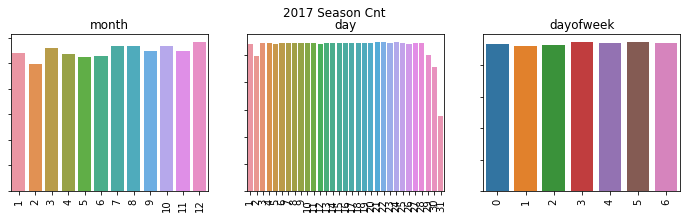

In [145]:
plt.figure(figsize = (12,3))
i = 1
df_tmp = df_train.loc[df_train.Date.dt.year == 2017,:]
for col in ['month', 'day', 'dayofweek']:
    ax = plt.subplot(1,3,i)
    cnt = df_tmp[col].value_counts()
    cnt.sort_index(inplace= True)
    sns.barplot(cnt.index, cnt.values, ax = ax)
    ax.set_title(col)
    ax.set_yticklabels('')
    ax.tick_params('x', rotation = 90)
    i += 1
plt.subplots_adjust(hspace = 0.2, top = 0.85)
plt.suptitle('2017 Season Cnt')
plt.show()

There are no special one month that has more data. But the Cnt of Day 2 and the tail of the month suddenly decrease. I can understand of the tail part since 2017 Feb has 28 days and some month doesn't have 31 day. And Day of week doesn't have any difference

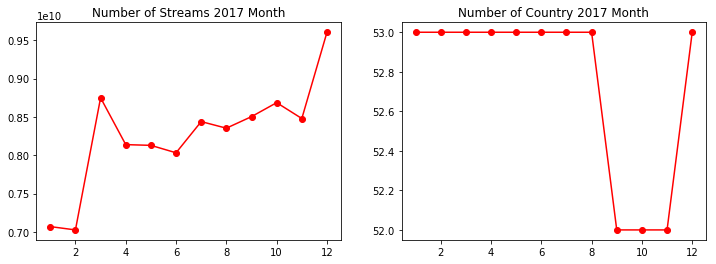

In [146]:
#Number of streams
month_user = df_train.loc[df_train.Date.dt.year == 2017,:].groupby('month')['Streams'].sum().to_frame()
f, ax =plt.subplots(1,2,figsize = (12,4))
ax[0].plot(np.arange(1,13), month_user['Streams'], '-ro')
ax[0].set_title('Number of Streams 2017 Month')
country_per_month = df_train.loc[df_train.Date.dt.year == 2017,:].groupby('month')['Region'].nunique().to_frame()
ax[1].plot(np.arange(1,13), country_per_month['Region'], '-ro')
ax[1].set_title('Number of Country 2017 Month')
plt.show()

This two graphs unveil the number of user increased! Spotify expand their area to music industry over and over

In [147]:
#Top 1
us_song = df_train.loc[df_train.Region == 'us',:]
df_stream = us_song[['Date', 'Track Name', 'Streams', 'Position']]
df_stream = df_stream.groupby(['Date', 'Track Name']).first().reset_index()
stream_num = df_stream.pivot(index = 'Date', columns = 'Track Name', values = 'Streams')
pos_num = df_stream.pivot(index = 'Date', columns = 'Track Name', values = 'Position')
us_unique_song = us_song['Track Name'].loc[us_song.Position == 1].unique()

def draw_stream_pos(us_unique_song, i, type_):
    song = us_unique_song[i]
    song_stream = stream_num.loc[:,song]
    song_pos = pos_num.loc[:,song]
    tmp = song_stream.loc[song_stream.notnull()]
    tmp2 = song_pos.loc[song_stream.notnull()]
    first = (tmp2.values == 1)
    not_first = ~first
    f, ax = plt.subplots(1,2,figsize = (12,4))
    ax[0].scatter(tmp.index[not_first], tmp.values[not_first], alpha = 0.4, color = 'grey')
    ax[0].scatter(tmp.index[first], tmp.values[first], color = 'red')
    ax[1].scatter(tmp2.index[not_first], tmp2.values[not_first], alpha = 0.4, color = 'grey')
    ax[1].scatter(tmp2.index[first], tmp2.values[first], color = 'red')
    ax[1].invert_yaxis()
    ax[1].set_title('Top1 Number : '+ str((tmp2.values == 1).sum()))
    ax[0].set_title(type_ + ': '+ song)
    plt.show()

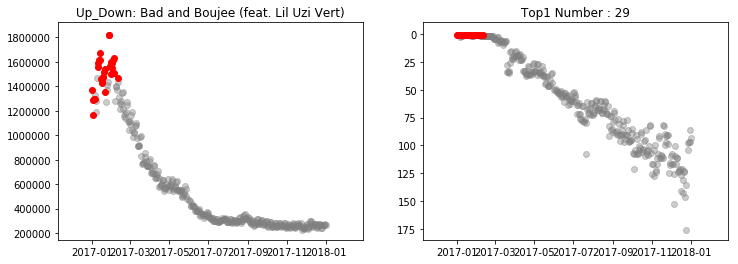

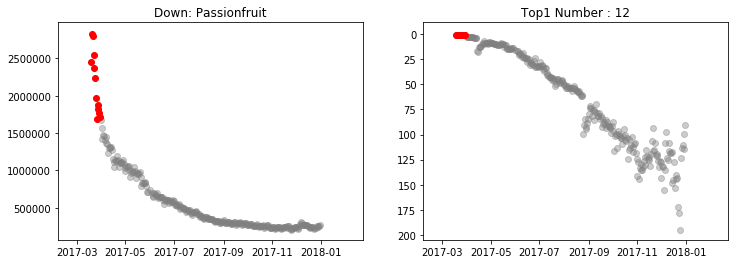

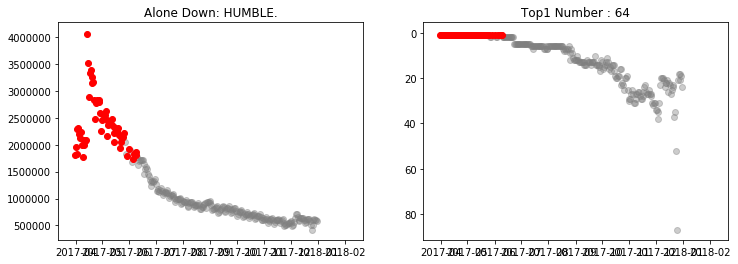

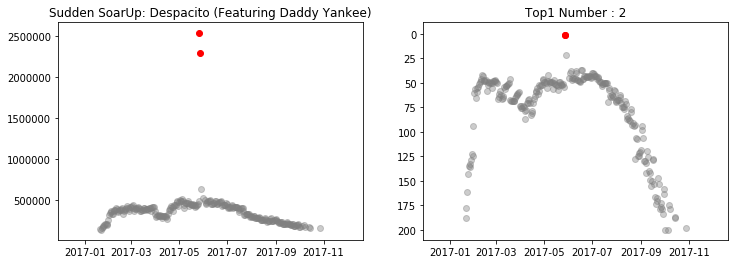

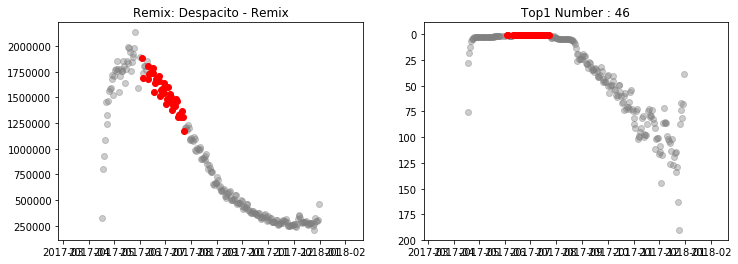

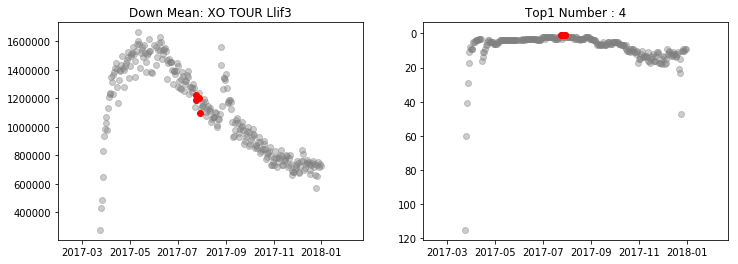

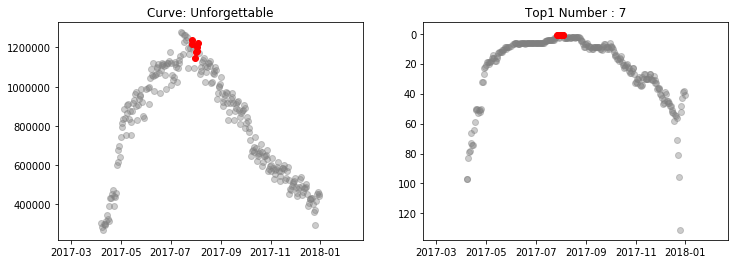

In [148]:
type_of_graph = {0: 'Up_Down', 2:'Down',3:'Alone Down', 4:'Sudden SoarUp', 5: 'Remix', 6:'Down Mean', 8:'Curve'}
for key, type_ in type_of_graph.items():
    draw_stream_pos(us_unique_song,key, type_)

In [149]:
#The above graphs show 7 different types of top 1
#1st graph: A general form which as soon as come back the number of stream increased then decreased smoothly
#2nd graph: Because of the popularity of the singer, a song even far soar up, then decreased.
#3rd graph: No enemy exist. The song alone touched 4 million! then keep its status over 2 million.
#4th graph: BroadCast Power!? Suddenly Soar up even though releasing date so much went.
#5th graph: Remix of the old version
#6th graph: Fortunately! The Top rankers Stream number decreased
#7th graph: Hidden Pearl Found, a step by step increased the streams and touch top, then decreased smoothly

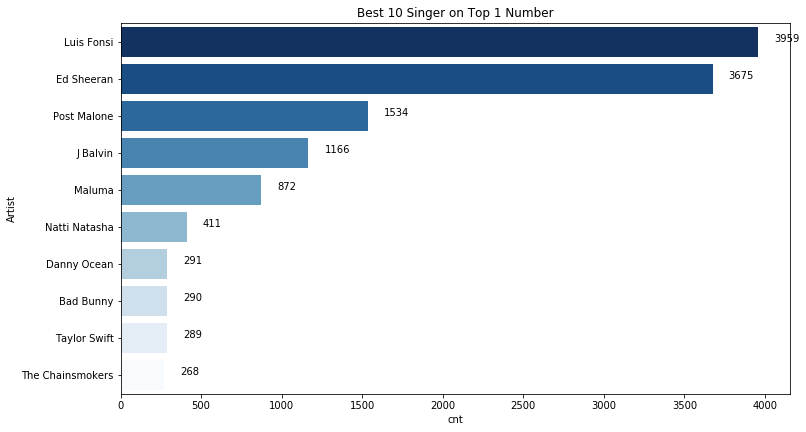

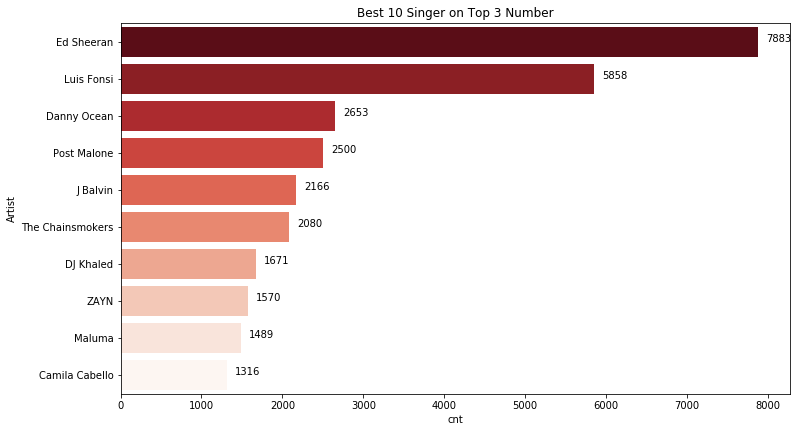

In [150]:
#Top Singers
top_chart = df_train.loc[df_train['Position'] == 1, 'Artist'].value_counts()
top_chart = top_chart.to_frame().reset_index()
top_chart.columns = ['Artist', 'cnt']

plt.figure(figsize = (12,15))
ax = plt.subplot(2,1,1)
sns.barplot(data = top_chart.iloc[:10,:], y = 'Artist', x = 'cnt', ax = ax, palette = plt.cm.Blues(np.linspace(1, 0, 10)))
for i in range(10):
    ax.text(top_chart.loc[i,'cnt']+100, i, str(top_chart.loc[i,'cnt']), fontsize = 10)
ax.set_title('Best 10 Singer on Top 1 Number')
plt.show()

top_chart = df_train.loc[df_train['Position'] <= 3, 'Artist'].value_counts()
top_chart = top_chart.to_frame().reset_index()
top_chart.columns = ['Artist', 'cnt']
plt.figure(figsize = (12,15))
ax = plt.subplot(2,1,2)
sns.barplot(data = top_chart.iloc[:10,:], y = 'Artist', x = 'cnt', ax = ax, palette = plt.cm.Reds(np.linspace(1, 0, 10)))
for i in range(10):
    ax.text(top_chart.loc[i,'cnt']+100, i, str(top_chart.loc[i,'cnt']), fontsize = 10)
ax.set_title('Best 10 Singer on Top 3 Number')
plt.show()

Ed Sheeran kept his highest status than the other!

In [151]:
df_sh = df_train.loc[df_train['Artist'] == 'Ed Sheeran',:]

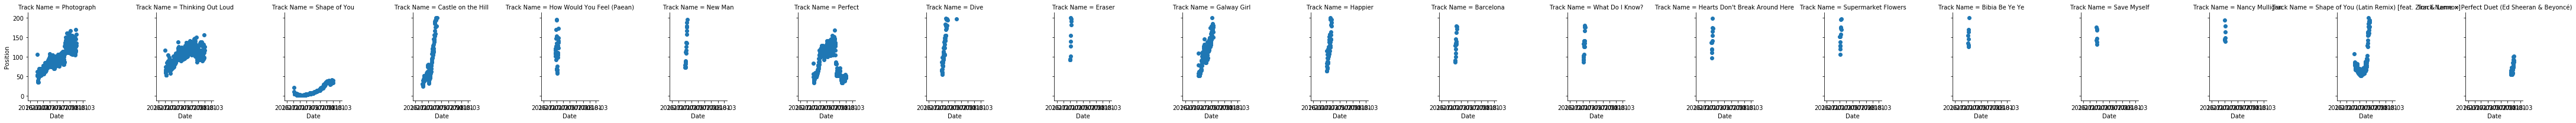

In [152]:
sh_region = df_sh['Region'].unique()
sh_ec = df_sh.loc[df_sh.Region == sh_region[0], :]
g = sns.FacetGrid(data = sh_ec, col = 'Track Name')
g.map(plt.scatter, 'Date', 'Position')
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

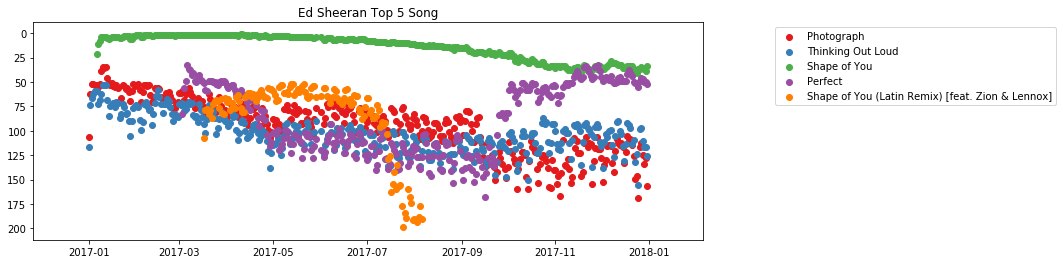

In [153]:
five_sh = sh_ec['Track Name'].value_counts()[:5].index.tolist()
plt.figure(figsize = (12,4))
ax = plt.subplot(1,1,1)
color = sns.color_palette('Set1',5)
i = 0
for track in five_sh:
    ix = sh_ec['Track Name'] == track
    ax.scatter(sh_ec.loc[ix, 'Date'].values, sh_ec.loc[ix,'Position'].values, c = color[i], label = track)
    i += 1
ax.invert_yaxis()
ax.legend(bbox_to_anchor = (1.1,1))
plt.title('Ed Sheeran Top 5 Song')
plt.show()

In [154]:
#Emotional songs

In [155]:
df_train['lower_Track'] = df_train['Track Name'].apply(lambda word: word.lower())
us_song = df_train['lower_Track'].loc[df_train.Region == 'us']
unique_Song = pd.DataFrame(us_song.unique(), columns = ['track'])
unique_Song['track_set'] = unique_Song['track'].apply(lambda title: set(title.split(' ')))
emotion_dict = {}
for row in positive_word.iterrows():
    char = row[1]['char']
    col_name = 'em_' + char
    char_set = row[1]['word_set']
    emotion_dict[col_name] = unique_Song['track_set'].apply(lambda title_set: 0 if len(title_set & char_set) == 0 else 1)
unique_Song = pd.concat([unique_Song,pd.DataFrame.from_dict(emotion_dict, orient = 'columns')], axis = 1)
unique_Song.drop('track_set', axis = 1, inplace = True)

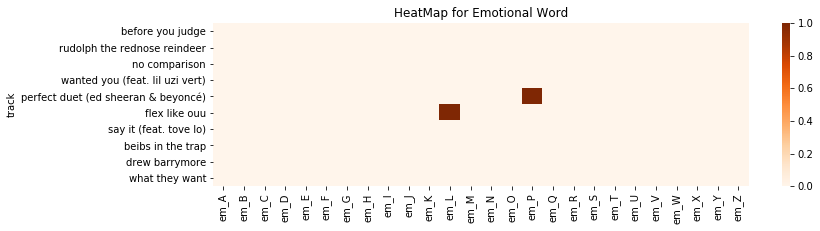

In [156]:
tmp_emotion = unique_Song.set_index('track')
plt.figure(figsize = (12,3))
ax = plt.subplot(1,1,1)
sns.heatmap(tmp_emotion.sample(10), cmap = plt.cm.Oranges, ax = ax)
ax.set_title('HeatMap for Emotional Word')
plt.show()

In [157]:
#Correlation US with other Chart

In [158]:
date = df_train.Date.sample(1).values[0]
region_pos = df_train.loc[df_train.Date == date, ['Position','Track Name','Region']]
region_pos = region_pos.loc[region_pos.Position <= 30, :]
region_grp = region_pos.groupby('Region')
us_pos = region_grp.get_group('us')
us_track = set(us_pos['Track Name'].unique().tolist())
total_track = len(us_track)
#무관심 정도: Track Number of the Intersection == 0
#지난 10일간: 무관심정도
#관심 정도: Among intersected track, sum(abs(USchart - Con chart)) -> 0 simliar impact
#관심 정도: Among intersected track, sum(squared(USchart - Con chart)) -> Larger Severeal difference
#관심 정도: Among intersected track, sum(with same sign (US Chart- Con Chart) of squared(USChart - Con chart))
#-> Many -: Con is usually upper, Many +: Con is usually downer
country_info = []
for i, con in enumerate(region_pos.Region.unique()):
    if con == 'us':
        continue
    con_grp = region_grp.get_group(con)
    con_track = set(con_grp['Track Name'].unique().tolist())
    inter_track = us_track & con_track
    num_interest = len(inter_track)
    if num_interest == 0:
        con_dict = {'un_track': total_track - num_interest, 'int_track': num_interest, 'abs_diff':-1, 'sq_diff':-1,
        'sq_diff_min':-1, 'sq_diff_plus':-1}
    else:
        con_dict = {'un_track': total_track - num_interest, 'int_track': num_interest}
        track_dict = {}
        for track in inter_track:
            dif = us_pos.loc[us_pos['Track Name'] == track, 'Position'].values[0] - con_grp.loc[con_grp['Track Name'] == track, 'Position'].values[0]
            track_dict[track] = [dif, np.sign(dif)]
            
        track_dict_pd = pd.DataFrame.from_dict(track_dict, orient = 'index')
        track_dict_pd.columns = ['dif', 'sign']
        con_dict['abs_diff'] = track_dict_pd.dif.abs().sum()
        con_dict['sq_diff'] = np.power(track_dict_pd.dif,2).sum()
        con_dict['sq_diff_min'] = np.power(track_dict_pd.dif.loc[track_dict_pd.sign == -1],2).sum()
        con_dict['sq_diff_plus'] = np.power(track_dict_pd.dif.loc[track_dict_pd.sign == 1],2).sum()
    con_dict['country'] = con
    con_dict['trackNum'] = total_track
    country_info.append(con_dict)

In [159]:
country_df = pd.DataFrame.from_dict(country_info, orient = 'columns')
#country_df.set_index('country', inplace = True)
country_df['full_name'] = country_df['country'].map(dict_count)
country_df = country_df.reindex(['full_name','un_track', 'int_track', 'abs_diff', 'sq_diff', 'sq_diff_min', 'sq_diff_plus', 'country', 'trackNum', ], axis=1)
country_df.sort_values('int_track', ascending = False, inplace = True)
country_df.head(7)

,full_name,un_track,int_track,abs_diff,sq_diff,sq_diff_min,sq_diff_plus,country,trackNum
21,Canada,10,20,119,1133,720,413,ca,30
47,Latvia,12,18,166,2484,1412,1072,lv,30
48,Greece,14,16,130,1620,1062,558,gr,30
9,New Zealand,14,16,143,1983,1255,728,nz,30
6,Lithuania,16,14,124,1726,652,1074,lt,30
29,Portugal,16,14,65,551,465,86,pt,30
46,Australia,17,13,65,519,35,484,au,30


In [160]:
#Smaller values, there are litte difference between chart positions among intersected track.

#abs_diff: sum(absolute( a position of a song in US chart - a position of the song in country Chart)) for song in Top 30 US Song on the date
#sq_diff: sum(squared( a position of a song in US chart - a position of the song in country Chart)) for song in Top 30 US Song on the date
#sq_diff_min: sum(squared( a position of a song in US chart - a position of the song in country Chart)) for song in Top 30 US Song & the US chart over the Country Chart on the date
#sq_diff_plus: sum(squared( a position of a song in US chart - a position of the song in country Chart)) for song in Top 30 US Song & the US chart under the Country Chart on the date

## Modeling

ARIMA model to predict tomorrow streams

In [161]:
#Setting basic parameter for Shape of You ARIMA model
df_train = pd.read_csv('data.csv')
df_train.dropna(inplace = True)
df_train['Date'] = pd.to_datetime(df_train['Date'])

df_us = df_train.loc[df_train.Region == 'us',:]
shape_of_you = df_us[['Date','Streams']].loc[df_us['Track Name'] == 'Shape of You',:]
shape_of_you.set_index('Date', inplace = True)

In [162]:
shape_of_you_tmp = shape_of_you.copy()

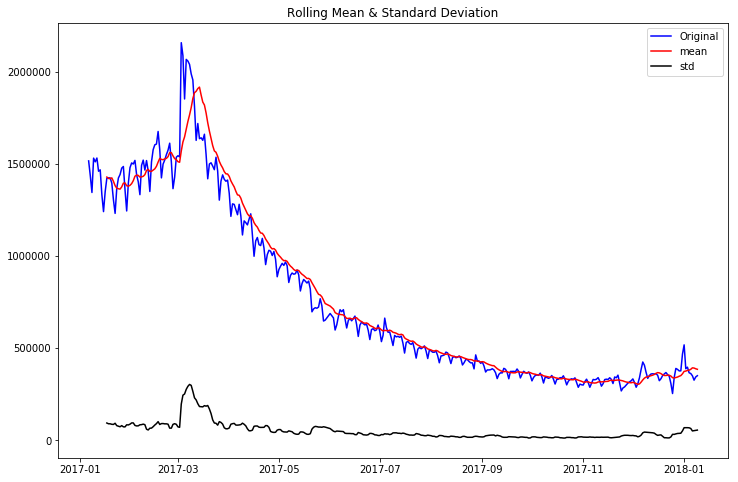

In [163]:
rollmean = pd.DataFrame.rolling(shape_of_you, window = 12).mean()
rollstd = pd.DataFrame.rolling(shape_of_you, window = 12).std()

fig = plt.figure(figsize=(12, 8))
plt.plot(shape_of_you, color = 'blue', label = 'Original')
plt.plot(rollmean, color = 'red', label = 'mean')
plt.plot(rollstd, color = 'k', label = 'std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [164]:
#As seen above, the streams linked to the last number of streams.

In [165]:
shape_of_you_tmp = shape_of_you.copy()
p_value = dict()
for tf in ['raw', 'log']:
    if tf == 'log':
        shape_of_you_tmp = np.log1p(shape_of_you_tmp)
        continue
    for dep in [0,1,2]:
        if dep == 0:
            tmp = shape_of_you_tmp.values
        elif dep == 1:
            tmp = shape_of_you_tmp.values.cumsum()
        elif dep == 2:
            tmp = shape_of_you_tmp.values.cumsum().cumsum()
            
        for reg in ['c', 'ct', 'ctt', 'nc']:
            dftest = adfuller(np.ravel(tmp), autolag='AIC', regression = reg)
            dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
            p_value[tf+'_'+reg + '_' + str(dep)] = dfoutput.loc['p-value']

p_value_df = pd.DataFrame([p_value]).T
p_value_df.columns = ['P value']
print(p_value_df[p_value_df.values < 0.05].sort_values('P value'))

            P value
raw_ctt_2  0.001408
raw_ct_1   0.006599
raw_c_1    0.010517


In [166]:
#We used Dickey_Fuller test for differencing order. It shows 1  and 2 are effective differencing orders.

To check why we need differencing, we will try autocorrelation and partial autocorrelation graph

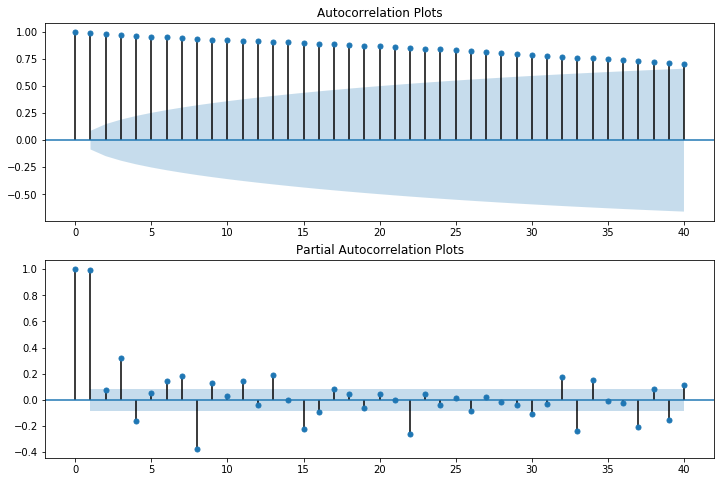

In [167]:
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(shape_of_you, lags=40, ax=ax1, alpha = 0.1)
ax1.set_title('Autocorrelation Plots')
ax2 = f.add_subplot(212)
f = plot_pacf(shape_of_you, lags=40, ax=ax2, alpha = 0.1)
ax2.set_title('Partial Autocorrelation Plots')
plt.show()

In [168]:
#If the autocorrelation is steadily high + The Number of Positive High Peak on Partial Autocorrelation Plot << The Number of Positive High Peak on Autocorrelation Plot
#->then "We Need a Higher Order!"

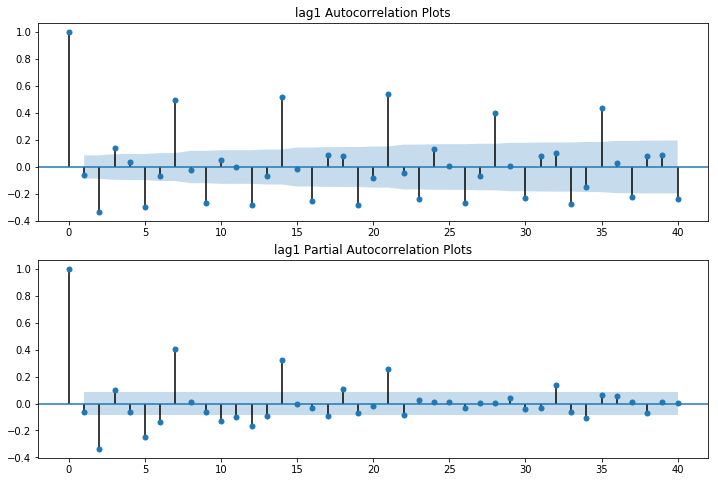

In [169]:
lag1_shape_of_you = shape_of_you - shape_of_you.shift(1)
lag2_shape_of_you = shape_of_you - 2*shape_of_you.shift(1) + shape_of_you.shift(2)
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(lag1_shape_of_you.dropna(inplace = False), lags=40, ax=ax1, alpha = 0.1)
ax1.set_title('lag1 Autocorrelation Plots')
ax2 = f.add_subplot(212)
f = plot_pacf(lag1_shape_of_you.dropna(inplace = False), lags=40, ax=ax2, alpha = 0.1)
ax2.set_title('lag1 Partial Autocorrelation Plots')
plt.show()

In [170]:
#There are some high peaks that appeared regulary with the interval 7. So we should have a question, "Are there any Seasonal Impact?"

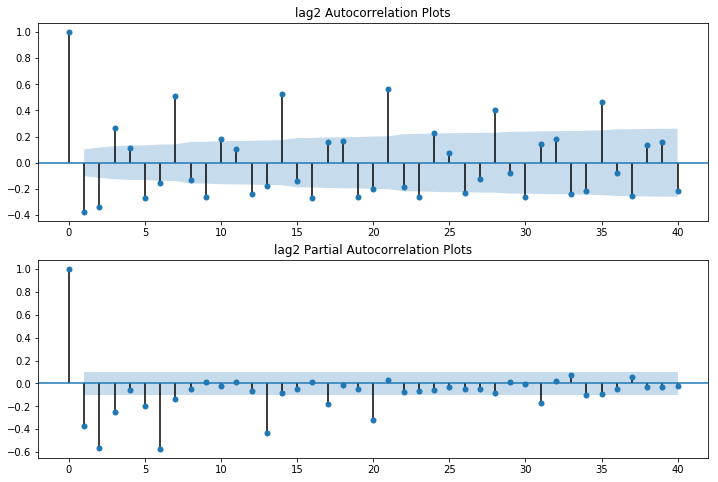

In [171]:
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(lag2_shape_of_you.dropna(inplace = False), lags=40, ax=ax1)
ax1.set_title('lag2 Autocorrelation Plots')

ax2 = f.add_subplot(212)
f = plot_pacf(lag2_shape_of_you.dropna(inplace = False), lags=40, ax=ax2, alpha = 0.05)
ax2.set_title('lag2 Partial Autocorrelation Plots')
plt.show()

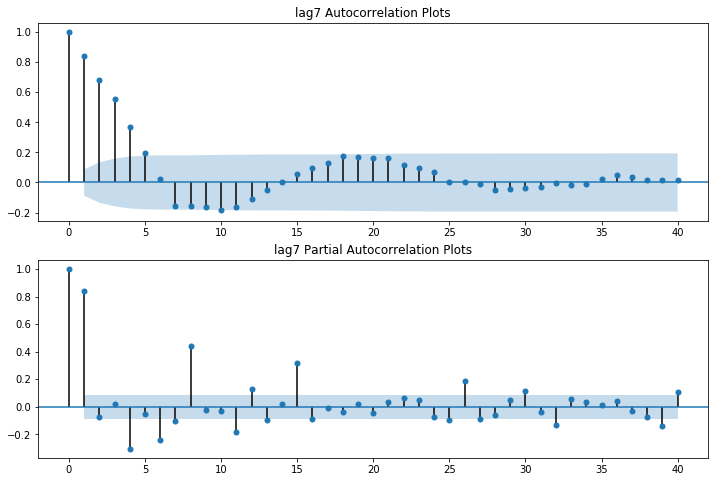

In [172]:
lag7_shape_of_you = shape_of_you - shape_of_you.shift(7)
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(lag7_shape_of_you.dropna(inplace = False), lags=40, ax=ax1, alpha = 0.1)
ax1.set_title('lag7 Autocorrelation Plots')
ax2 = f.add_subplot(212)
f = plot_pacf(lag7_shape_of_you.dropna(inplace = False), lags=40, ax=ax2, alpha = 0.1)
ax2.set_title('lag7 Partial Autocorrelation Plots')
plt.show()


In [173]:
#When the magnitue is under 0.5, it indicated the Difference Order have to be lower.

In [174]:
#We need positive peaks under small impacts

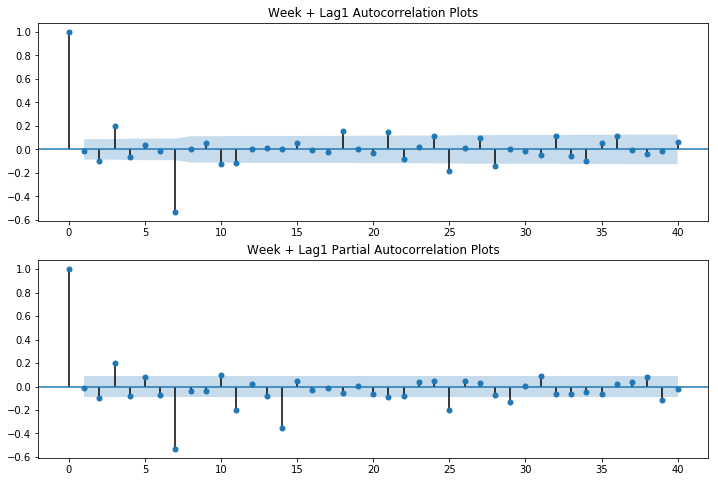

In [175]:
season_diff_shape_of_you = lag1_shape_of_you - lag1_shape_of_you.shift(7)
f= plt.figure(figsize = (12,8))
ax1= f.add_subplot(211)
f = plot_acf(season_diff_shape_of_you.dropna(inplace = False), lags=40, ax=ax1, alpha = 0.1)
ax1.set_title('Week + Lag1 Autocorrelation Plots')
ax2 = f.add_subplot(212)
f = plot_pacf(season_diff_shape_of_you.dropna(inplace = False), lags=40, ax=ax2, alpha = 0.1)
ax2.set_title('Week + Lag1 Partial Autocorrelation Plots')
plt.show()

In [176]:
#We found some negative and positive peaks. Here we choose (1,1,0) x (1,1,0) as a base parameter of ARIMA Seasonal Model!

In [177]:
def get_X(song):
    nrows = song.shape[0]
    num_train = int(nrows * 0.8)
    X_train, X_test = song.iloc[np.arange(0,num_train),:], song.iloc[np.arange(num_train, nrows),:]
    return X_train, X_test, (nrows, num_train)

def mdl_shape(mdl, row_info, name = '(1,1,0)x(1,1,0,7)xtrend t Model',exog = None, portion = 0.5):
    nrows, num_train = row_info
    result = mdl.fit()
    forecast = result.predict(start = int(nrows*portion), end = num_train, dynamic = True, exog = exog)
    X_train['forecast'] = np.hstack([np.zeros((int(nrows*portion)-1)), forecast.values])
    f,ax = plt.subplots(1,1,figsize = (12,4))
    X_train[['Streams','forecast']].plot(ax = ax)
    ax.set_title(name)
    plt.show()

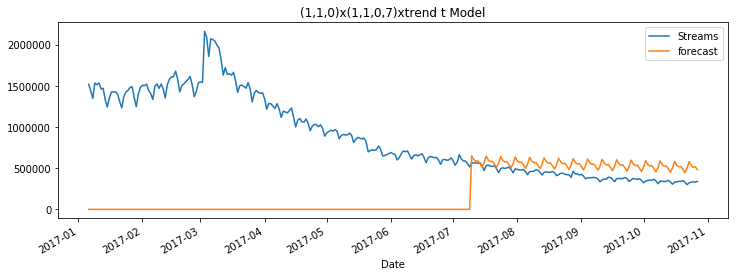

In [178]:
X_train, X_test,row_info = get_X(shape_of_you)
#Current Modl
mdl1 = SARIMAX(X_train, trend = 'n', order=(1,1,0), seasonal_order=(1,1,0,7))
mdl_shape(mdl1,row_info)

In [179]:
#This was really bad model as the parameters didn't reflect the trend

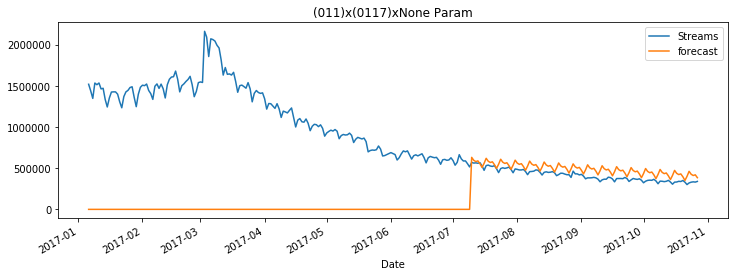

In [180]:
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl2 = SARIMAX(X_train, trend = 'n', order=(0,1,1), seasonal_order=(0,1,1,7))
mdl_shape(mdl2, row_info,name = '(011)x(0117)xNone Param')

In [181]:
#Tweaking the parameters gave good results and was better than the previous one.

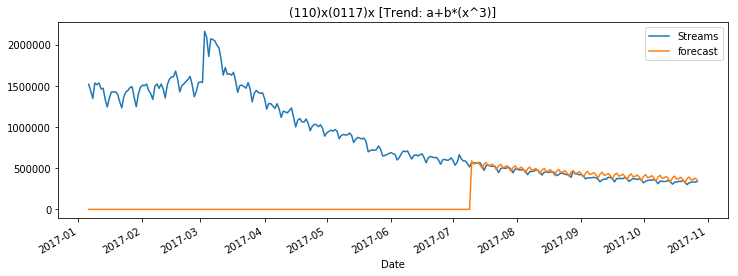

In [182]:
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl2 = SARIMAX(X_train, trend = [1,0,0,1], order=(1,1,0), seasonal_order=(0,1,1,7))
mdl_shape(mdl2, row_info,name = '(110)x(0117)x [Trend: a+b*(x^3)]')
#mdl2 = SARIMAX(X_train, trend = [1,0,0,1], order=(1,1,0), seasonal_order=(0,1,1,7))
#mdl_shape(mdl2, name = '(110)x(0117)x [Trend: a1 + a2*(x^3)]')

In [183]:
#After further change of parameters it gave much better results than the previous one.

In [184]:
def prediction_mdl(mdl,row_info, X_test, name = '', exog = None):
    nrows, num_train = row_info
    result = mdl2.fit()

    forecast = result.predict(start = num_train-1, end = nrows, dynamic = True, exog = exog)
    X_test['forecast'] = forecast[2:].values

    f,ax = plt.subplots(1,1,figsize = (12,4))
    X_test[['Streams','forecast']].plot(ax = ax)
    ax.set_title(name)
    plt.show()

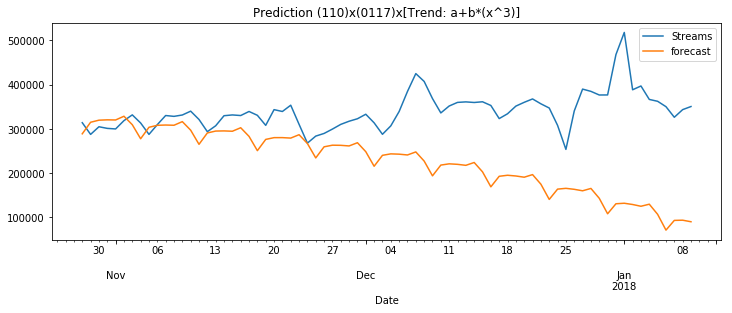

In [185]:
X_train, X_test, row_info = get_X(shape_of_you)
mdl2 = SARIMAX(X_train, trend = [1,0,0,1], order=(1,1,0), seasonal_order=(0,1,1,7))
prediction_mdl(mdl2, row_info, X_test, name = 'Prediction (110)x(0117)x[Trend: a+b*(x^3)]')

In [186]:
#This was a disaster as we kept the trend constant. We try deleting the constant trend and decrease the power 3-> 1

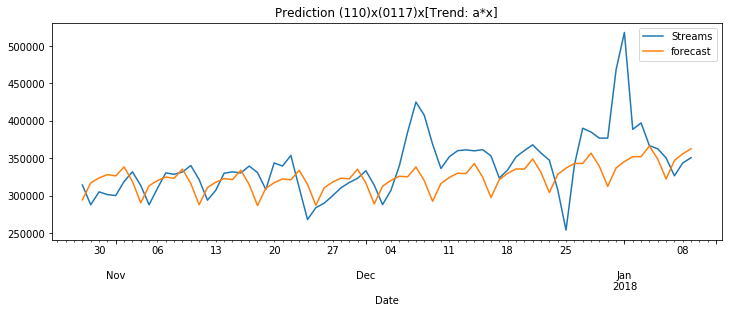

In [187]:
X_train, X_test,row_info = get_X(shape_of_you)
mdl2 = SARIMAX(X_train, trend = [0,1,0,0], order=(1,1,0), seasonal_order=(0,1,1,7))
prediction_mdl(mdl2, row_info, X_test, name = 'Prediction (110)x(0117)x[Trend: a*x]')

In [188]:
#Shows a good predict

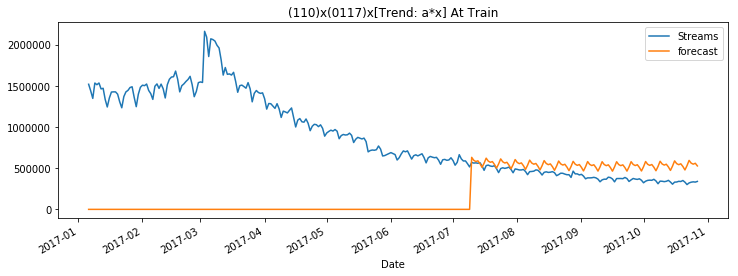

In [189]:
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl2 = SARIMAX(X_train, trend = [0,1,0,0], order=(1,1,0), seasonal_order=(0,1,1,7))
mdl_shape(mdl2, row_info,name = '(110)x(0117)x[Trend: a*x] At Train')

In [190]:
#The paramters didn't work in the training set. We try adding x variable

In [191]:
def tf_song_feature(song_feature):
    song_feature.drop(['id'], axis = 1, inplace= True)
    song_feature.rename(columns = {'name': 'Track Name', 'artists': 'Artist'}, inplace= True)
    return song_feature

song_feature = pd.read_csv('featuresdf.csv')
song_feature = tf_song_feature(song_feature)
exog = song_feature.loc[0,:].values[2:]

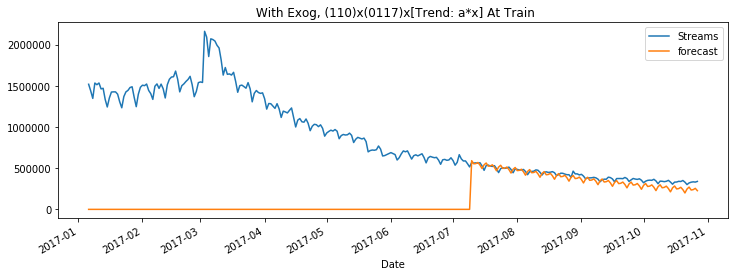

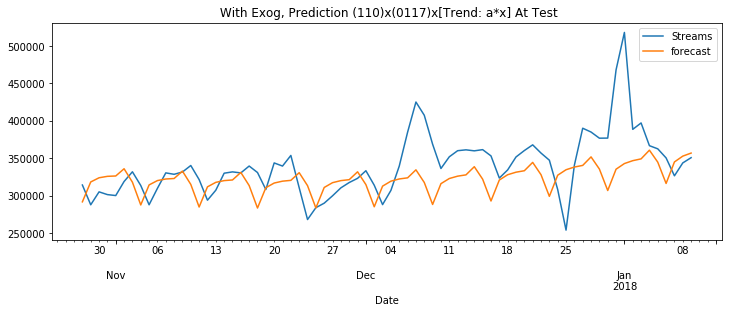

In [216]:
exog = exog.astype(float)
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl2 = SARIMAX(endog = X_train,exog = np.array([exog for i in range(X_train.shape[0])]), trend = [0,1,0,0], order=(1,1,0), seasonal_order=(0,1,1,7))
mdl_shape(mdl2, row_info,name = ' With Exog, (110)x(0117)x[Trend: a*x] At Train', exog = exog.reshape(1,13))
X_train, X_test,row_info = get_X(shape_of_you)
prediction_mdl(mdl2, row_info, X_test, name = ' With Exog, Prediction (110)x(0117)x[Trend: a*x] At Test', exog = np.array([exog for i in range(75)]))

In [193]:
#Adding x variable improved the model a lot

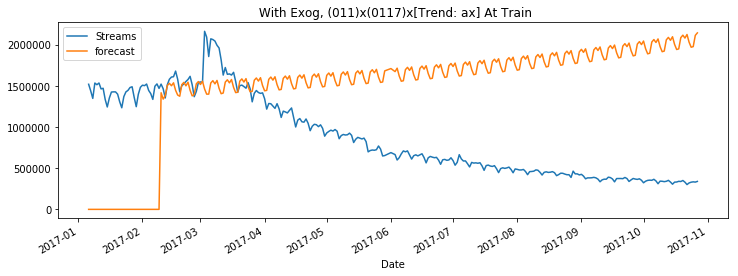

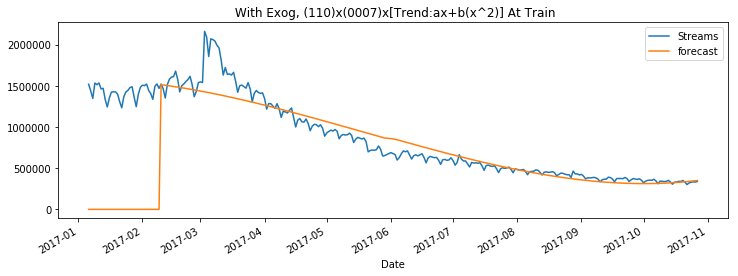

In [194]:
X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl3 = SARIMAX(endog = X_train,exog = np.array([exog for i in range(X_train.shape[0])]), trend = 't', order=(0,1,1), seasonal_order=(1,1,0,7))
mdl_shape(mdl3, row_info,name = ' With Exog, (011)x(0117)x[Trend: ax] At Train', exog = exog.reshape(1,13), portion = 0.1)

X_train, X_test, row_info = get_X(shape_of_you)
#Current Modl
mdl3 = SARIMAX(endog = X_train,exog = np.array([exog for i in range(X_train.shape[0])]), trend = [0,1,1], order=(1,1,0), seasonal_order=(0,0,0,7))
mdl_shape(mdl3, row_info,name = ' With Exog, (110)x(0007)x[Trend:ax+b(x^2)] At Train', exog = exog.reshape(1,13), portion = 0.1)

In [195]:
#The exogenous SARIMAX proved to be a good model. 
#In the previous prediction the power peak up, ARIMA completely ignored the peak up the all equations.

In [196]:
#Different Models


In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

In [198]:
df_features = pd.read_csv('SpotifyFeatures.csv')

In [199]:
list_of_keys = df_feature['key'].unique()
for i in range(len(list_of_keys)):
    df_features.loc[df_features['key'] == list_of_keys[i], 'key'] = i
df_features.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
158342,Country,The Grass Roots,Two Divided By Love,44rgrupkXz3sZ7TkWHiccI,45,0.1250,0.668,155933,0.626,0.00000,4,0.107,-10.085,Major,0.0300,123.436,4/4,0.9630
195363,Soundtrack,Alexandre Desplat,Just Another Dead Rat in a Garbage Pail (Behin...,3QYAYO93cGwtAlbV8k9EAM,28,0.5960,0.606,153493,0.224,0.12400,2,0.081,-15.382,Minor,0.0528,118.012,4/4,0.0345
132205,Reggaeton,Ivy Queen,Yo Quiero Saber,5DfHmPFEbm2P9hcAqcgfzP,41,0.1400,0.847,176200,0.897,0.00001,5,0.229,-4.758,Minor,0.0575,95.013,4/4,0.8590
92276,Children’s Music,Deftones,Hearts / Wires,1SeMnyEb5dwCBLU3QUC0K2,53,0.0228,0.507,320547,0.520,0.32500,10,0.108,-8.725,Minor,0.0355,127.030,4/4,0.1690
169766,Ska,Los Cafres,Barrilete - Versión 25 Años,4gBHDY57jJt4b3k4c0nMHO,39,0.2560,0.711,302547,0.551,0.00126,11,0.115,-7.603,Major,0.0612,167.935,4/4,0.8900


In [200]:
df_features.loc[df_features["mode"] == 'Major', "mode"] = 1
df_features.loc[df_features["mode"] == 'Minor', "mode"] = 0
df_features.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
23011,Blues,Kali Uchis,Sycamore Tree,34E2yJTGNWElxDetLk4on5,50,0.950000,0.521,111509,0.188,0.00000,6,0.229,-6.301,1,0.0694,52.181,4/4,0.4690
61900,R&B,ChrisandQueen,Maybe,6B4puO2ZgU91RhiimfNsoo,52,0.085800,0.678,212219,0.529,0.00000,5,0.100,-8.120,1,0.1950,102.017,4/4,0.0962
153760,Country,Taylor Acorn,Without You,1dNLTnYHf31kZGmZZA6OOg,47,0.001910,0.615,151842,0.802,0.00000,6,0.104,-5.072,0,0.0450,114.065,4/4,0.5480
219893,Ska,Direct Hit!,Werewolf Shame,1ib542Id9vi8We8y4SSuWX,38,0.000584,0.452,194222,0.973,0.00006,4,0.256,-4.296,1,0.0527,99.997,4/4,0.5370
37559,R&B,Chloe x Halle,Happy Without Me,1mQI744KrltnCU798zIGEe,66,0.228000,0.570,206947,0.576,0.00000,0,0.330,-6.792,1,0.0631,143.943,4/4,0.4380


In [201]:
list_of_time_signatures = df_features['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    df_features.loc[df_features['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
df_features.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
86196,Classical,Aaron Copland,Appalachian Spring: III. Moderato,76mNq1Fz3Kt3nVo9DWn9bc,24,0.9770,0.0766,231640,0.0289,0.910000,5,0.1840,-24.189,1,0.0442,177.179,0,0.0346
215877,Rock,Triathalon,Hard to Move,6LG8oSODi4k1DOePFbAlki,51,0.2100,0.5200,333045,0.4400,0.005310,7,0.1150,-12.165,0,0.0430,94.955,0,0.6720
82550,Blues,Bad Suns,Swimming In The Moonlight,2PoqubfYq2Cl0nUyrrTht6,58,0.0322,0.6620,221280,0.9040,0.000680,0,0.2790,-4.611,0,0.0472,129.945,0,0.6960
13969,Pop,Jack Ü,Where Are Ü Now (with Justin Bieber),66hayvUbTotekKU3H4ta1f,77,0.0410,0.4320,250286,0.7810,0.000004,9,0.0789,-4.038,0,0.0567,139.432,0,0.1970
113511,Hip-Hop,Guru Randhawa,Suit Suit,2mwBSO58y92EYmEFpDfmS7,55,0.1400,0.7670,190132,0.8690,0.000000,3,0.2210,-3.381,0,0.0908,98.208,0,0.7510


In [202]:
#Popularity
df_features.loc[df_features['popularity'] < 57, 'popularity'] = 0 
df_features.loc[df_features['popularity'] >= 57, 'popularity'] = 1
df_features.loc[df_features['popularity'] == 1]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
242,Alternative,Joji,SLOW DANCING IN THE DARK,0rKtyWc8bvkriBthvHKY8d,1,0.544000,0.5150,209274,0.4790,0.005980,1,0.1910,-7.458,1,0.0261,88.964,0,0.2840
243,Alternative,YUNGBLUD,11 Minutes (with Halsey feat. Travis Barker),4mGdjNMo0RonTlOEb7cYg4,1,0.011600,0.4640,239507,0.8520,0.000000,6,0.1080,-3.804,1,0.0670,160.075,0,0.2330
244,Alternative,H.E.R.,Best Part (feat. Daniel Caesar),4OBZT9EnhYIV17t4pGw7ig,1,0.795000,0.4730,209400,0.3710,0.000000,9,0.1090,-10.219,0,0.0405,75.208,0,0.4130
245,Alternative,Joji,YEAH RIGHT,1VGzxJnVQND7Cg5H5wGj14,1,0.619000,0.6720,174358,0.5880,0.241000,0,0.0992,-9.573,1,0.1330,169.033,0,0.2040
246,Alternative,H.E.R.,Could've Been (feat. Bryson Tiller),6lzLjIOyWTyTJvk0jraYee,1,0.640000,0.5450,248467,0.3300,0.000007,0,0.2200,-11.719,0,0.1640,103.553,0,0.3990
247,Alternative,Joji,CAN'T GET OVER YOU (feat. Clams Casino),39oeKRgsLeynDIbWuXyA47,1,0.684000,0.9000,107077,0.3160,0.077100,7,0.0853,-8.797,1,0.3320,129.914,0,0.8440
248,Alternative,6LACK,Pretty Little Fears (feat. J. Cole),4at3d5QWnlibMVN75ECDrp,1,0.711000,0.6110,240342,0.4660,0.000264,7,0.0847,-11.361,1,0.3720,192.080,0,0.2230
249,Alternative,lovelytheband,broken,6XcfKZvJio9Z0fQy11GnNX,1,0.001750,0.6660,204878,0.7280,0.000004,8,0.0429,-5.808,1,0.0419,122.996,0,0.5100
250,Alternative,Joji,TEST DRIVE,1DMEzmAoQIikcL52psptQL,1,0.710000,0.6460,179423,0.6480,0.003160,1,0.1080,-8.602,1,0.0372,75.004,0,0.4660
251,Alternative,Smash Mouth,All Star,3cfOd4CMv2snFaKAnMdnvK,1,0.031900,0.7310,200373,0.8610,0.000000,6,0.0829,-5.881,1,0.0323,104.034,0,0.7800


In [203]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness", 
            "mode", "speechiness", "tempo", "time_signature", "valence"]

In [204]:
training = df_features.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = df_features.drop(training.index)[features]

In [205]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [206]:
#Logistic Regression

In [207]:
lr = LogisticRegression()
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.7497945543198379


In [208]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 0.9208075384868241


In [209]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

Accuracy: 0.7764750999835643


In [210]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))


Accuracy: 0.8750890264614036


In [211]:
training_LSVC = training.sample(10000)
X_train_LSVC = training_LSVC[features]
y_train_LSVC = training_LSVC['popularity']
X_test_LSVC = df_features.drop(training_LSVC.index)[features]
X_train_LSVC, X_valid_LSVC, y_train_LSVC, y_valid_LSVC = train_test_split(
    X_train_LSVC, y_train_LSVC, test_size = 0.2, random_state = 420)

In [212]:
LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train_LSVC, y_train_LSVC)
LSVC_Predict = LSVC_Model.predict(X_valid_LSVC)
LSVC_Accuracy = accuracy_score(y_valid_LSVC, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy))

Accuracy: 0.676


In [213]:
XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_valid)
XGB_Accuracy = accuracy_score(y_valid, XGB_Predict)
print("Accuracy: " + str(XGB_Accuracy))

Accuracy: 0.7497945543198379


In [214]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC',
                                                      'XGBClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_Accuracy,
                                                         XGB_Accuracy]})

In [215]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.920808
3,DecisionTreeClassifier,0.875089
2,KNeighborsClassifier,0.776475
0,LogisticRegression,0.749795
5,XGBClassifier,0.749795
4,LinearSVC,0.676000


## Conclusion

Using a dataset of Spotify Tracks, we were able to predict popularity using audio-based metrics such as key, mode, and danceability without external metrics such as artist name, genre, and release date. The Random Forest Classifier was the best performing algorithm with 92.0% accuracy. The Decision Tree Classifier was the second best performing algorithm with 87.5% accuracy.